In [5]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint
import seaborn as sns

# Demographic Data
### Load data from demographic file

In [6]:
#import demographic data that is held in single csv. includes general info about participants, and answers to provided questionaire.
demo_file = r'Source_Data\Micro_Motion_2012\demographics\self_reportNM12.csv'
demographics = pd.read_csv(demo_file)

### Investigate demographic information

In [7]:
demographics.head()

,Group,Subject,Age,Sex,Height (m),Music listening hours/week,Perform/produce/compose music hours/week,Dance hours/week,Exercise (no dance) hours/week,Tiresome experience (1-5),Experience of motion (1-5),Experience of moving more to music (1-5),Eyes open?,Locked knees?,Mean QoM,Mean QoM w/oM,Mean QoM w M,NoMus-Mus Diff
0,A,1,23,M,1.72,5,30.0,1.0,7.0,3,3.0,2,1.0,1.0,8.271082,7.955534,8.586613,0.631079
1,A,2,24,M,1.67,10,10.0,2.0,10.0,1,2.0,2,1.0,1.0,11.224096,10.627763,11.820396,1.192633
2,A,3,27,F,1.63,14,1.0,4.0,3.0,4,3.0,4,0.0,0.5,6.441350,6.063694,6.818985,0.755291
3,A,4,27,M,1.75,5,20.0,2.0,2.0,4,5.0,3,1.0,1.0,5.216179,5.289182,5.143181,-0.146001
4,A,9,24,F,1.64,15,0.0,2.0,6.0,2,2.0,1,1.0,1.0,5.151870,4.940202,5.363525,0.423323


In [8]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Group                                     91 non-null     object 
 1   Subject                                   91 non-null     int64  
 2   Age                                       91 non-null     int64  
 3   Sex                                       90 non-null     object 
 4   Height (m)                                91 non-null     float64
 5   Music listening hours/week                91 non-null     int64  
 6   Perform/produce/compose music hours/week  91 non-null     float64
 7   Dance hours/week                          91 non-null     float64
 8   Exercise (no dance) hours/week            91 non-null     float64
 9   Tiresome experience (1-5)                 91 non-null     int64  
 10  Experience of motion (1-5)              

### Remove and/or modify NaN values

In [9]:
demographics[demographics['Eyes open?'].isnull()]

,Group,Subject,Age,Sex,Height (m),Music listening hours/week,Perform/produce/compose music hours/week,Dance hours/week,Exercise (no dance) hours/week,Tiresome experience (1-5),Experience of motion (1-5),Experience of moving more to music (1-5),Eyes open?,Locked knees?,Mean QoM,Mean QoM w/oM,Mean QoM w M,NoMus-Mus Diff
74,P,1,24,M,1.72,35,40.0,0.0,1.0,2,4.0,3,NaN,NaN,9.022333,8.926027,9.118634,0.192607
75,P,2,23,F,1.64,6,3.0,2.0,4.0,3,4.0,3,NaN,NaN,5.662621,5.854347,5.470907,-0.383440
76,P,3,51,F,1.52,10,10.0,0.0,0.5,1,2.0,2,NaN,NaN,4.594001,4.438988,4.749006,0.310018
77,P,4,24,F,1.73,3,0.0,1.0,0.5,3,4.0,3,NaN,NaN,7.740670,7.749527,7.731813,-0.017714
78,P,5,21,M,1.76,3,10.0,0.5,3.0,2,3.0,2,NaN,NaN,7.140620,7.147052,7.134189,-0.012864
79,P,6,36,F,1.61,4,2.0,0.0,0.0,5,4.0,4,NaN,NaN,4.301132,4.151781,4.450474,0.298692
80,P,7,24,M,1.73,3,3.0,0.5,0.5,4,3.0,2,NaN,NaN,5.890001,5.723056,6.056937,0.333881
81,P,8,24,F,1.71,30,30.0,4.0,4.0,3,2.0,4,NaN,NaN,6.004398,6.105638,5.903164,-0.202474
82,P,9,22,F,1.66,20,6.0,3.0,1.0,2,3.0,2,NaN,NaN,5.059475,5.106874,5.012078,-0.094797
83,P,10,22,M,1.89,7,7.0,0.0,4.5,5,3.0,1,NaN,NaN,10.248176,9.667558,10.828762,1.161204


The data seems relatively clean. most columns are numeric type with the exception of Group and Sex. There is one participant who didn't provide Sex info, we can drop this row without considerable affect to data. There are 17 participants who have no value for 'Eyes open?' and 'Locked knees'. This happened for all participants in the P group. For now we will enter 0.5 which represents both for both of these columns. If these two columns are found to be strong indicators of movement we can revisit this decision and review it affect more closely. There is also one participant who didn't give an experience of motion answer, we will use a mean of the column to fill.

In [10]:
#Fill NaN values under 'Eyes open?' and 'Locked knees' with 0.5
demographics['Eyes open?'].fillna(0.5, inplace=True)
demographics['Locked knees?'].fillna(0.5, inplace=True)
print(demographics[demographics['Group']=='P'].T)

                                                74       75        76  \
Group                                            P        P         P   
Subject                                          1        2         3   
Age                                             24       23        51   
Sex                                              M        F         F   
Height (m)                                    1.72     1.64      1.52   
Music listening hours/week                      35        6        10   
Perform/produce/compose music hours/week        40        3        10   
Dance hours/week                                 0        2         0   
Exercise (no dance) hours/week                   1        4       0.5   
Tiresome experience (1-5)                        2        3         1   
Experience of motion (1-5)                       4        4         2   
Experience of moving more to music (1-5)         3        3         2   
Eyes open?                                     0.5 

The column names are rather long. We are going to replace some of them them with shorter versions.

In [11]:
#rename columns with shorter names
new_columns = {'Height (m)':'Height',
               'Music listening hours/week':'Listen', 
               'Perform/produce/compose music hours/week':'Produce', 
               'Dance hours/week':'Dance', 
               'Exercise (no dance) hours/week':'Exercise', 
               'Tiresome experience (1-5)':'Tiresome', 
               'Experience of motion (1-5)':'Exper_silent', 
               'Experience of moving more to music (1-5)':'Exper_music', 
               'Eyes open?':'Eyes', 
               'Locked knees?':'Knees'}
demos = demographics.rename(columns=new_columns)

In [12]:
#drop row with NaN in sex column
#print(demos.shape)
#demos.dropna(subset=['Sex'], inplace=True)
#print(demos.shape)

In [13]:
#Fill single datapoint in Exper_silent with mean from column
demos['Exper_silent'].fillna(demos['Exper_silent'].mean(), inplace=True)
print(demos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Group           91 non-null     object 
 1   Subject         91 non-null     int64  
 2   Age             91 non-null     int64  
 3   Sex             90 non-null     object 
 4   Height          91 non-null     float64
 5   Listen          91 non-null     int64  
 6   Produce         91 non-null     float64
 7   Dance           91 non-null     float64
 8   Exercise        91 non-null     float64
 9   Tiresome        91 non-null     int64  
 10  Exper_silent    91 non-null     float64
 11  Exper_music     91 non-null     int64  
 12  Eyes            91 non-null     float64
 13  Knees           91 non-null     float64
 14  Mean QoM        91 non-null     float64
 15  Mean QoM w/oM   91 non-null     float64
 16  Mean QoM w M    91 non-null     float64
 17  NoMus-Mus Diff  91 non-null     float

### Create global participant ID column
It will be simpler to have a single column to note individual participants instead of two ,'Group' and 'Subject'. As all grouping are undertood to have had the same experience and not affected each other, we will create a new column that simply numbers particpants 1 to 90. This will also remove any confusion about the few particpants who didn't provide a survey and missing numbers within groups. We will need to perform the same column addition to the motion data in order to properly line them up and will leave the 'Group' and 'Subject' columns in place for now incase they are usful for combining on. 

In [14]:
#add column for Participant ID, PID
demos['PID']=list(range (1,92))
demos.head()

,Group,Subject,Age,Sex,Height,Listen,Produce,Dance,Exercise,Tiresome,Exper_silent,Exper_music,Eyes,Knees,Mean QoM,Mean QoM w/oM,Mean QoM w M,NoMus-Mus Diff,PID
0,A,1,23,M,1.72,5,30.0,1.0,7.0,3,3.0,2,1.0,1.0,8.271082,7.955534,8.586613,0.631079,1
1,A,2,24,M,1.67,10,10.0,2.0,10.0,1,2.0,2,1.0,1.0,11.224096,10.627763,11.820396,1.192633,2
2,A,3,27,F,1.63,14,1.0,4.0,3.0,4,3.0,4,0.0,0.5,6.441350,6.063694,6.818985,0.755291,3
3,A,4,27,M,1.75,5,20.0,2.0,2.0,4,5.0,3,1.0,1.0,5.216179,5.289182,5.143181,-0.146001,4
4,A,9,24,F,1.64,15,0.0,2.0,6.0,2,2.0,1,1.0,1.0,5.151870,4.940202,5.363525,0.423323,5


In [15]:
demos['Group'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'P'], dtype=object)

# Motion Data
### Load motion data

In [16]:
#Load motion data fromm CSV 
motion_file = r'Source_Data\Micro_Motion_2012\mocap_data\nmA.tsv'
motion_rawA = pd.read_csv(motion_file, delimiter='\t', encoding='utf-8', skiprows=10, low_memory=False)

In [17]:
#review motion data formating
print(motion_rawA.head())
print(motion_rawA.info())

   static X  static Y  static Z     s1 X      s1 Y      s1 Z     s2 X  \
0  1243.829   889.333  1784.341  159.596  1845.594  1732.156  927.264   
1  1243.832   889.318  1784.349  159.583  1845.451  1732.144  927.266   
2  1243.835   889.317  1784.334  159.584  1845.308  1732.126  927.277   
3  1243.816   889.327  1784.333  159.587  1845.180  1732.105  927.261   
4  1243.806   889.341  1784.343  159.597  1845.072  1732.103  927.284   

       s2 Y      s2 Z      s3 X  ...    s10 X    s10 Y     s10 Z     s11 X  \
0  1928.828  1696.346  1738.201  ...  892.079  161.142  1812.422  1676.339   
1  1928.791  1696.369  1738.162  ...  892.071  161.157  1812.413  1676.271   
2  1928.752  1696.383  1738.095  ...  892.068  161.142  1812.395  1676.257   
3  1928.725  1696.360  1738.024  ...  892.057  161.145  1812.397  1676.118   
4  1928.722  1696.362  1738.010  ...  892.062  161.147  1812.395  1676.077   

     s11 Y     s11 Z     s12 X   s12 Y     s12 Z  Unnamed: 27  
0  170.687  1916.486  2488.2

The motion data seems pretty clean with only the elimination of a single empty column, 'Unnamed: 27', needing to be removed

In [18]:
motion_rawA.drop(columns='Unnamed: 27', inplace=True)
motion_rawA.columns

Index(['static X', 'static Y', 'static Z', 's1 X', 's1 Y', 's1 Z', 's2 X',
       's2 Y', 's2 Z', 's3 X', 's3 Y', 's3 Z', 's4 X', 's4 Y', 's4 Z', 's9 X',
       's9 Y', 's9 Z', 's10 X', 's10 Y', 's10 Z', 's11 X', 's11 Y', 's11 Z',
       's12 X', 's12 Y', 's12 Z'],
      dtype='object')

### Break up motion by participant
First workout system with single paticipant, then expand with function

In [19]:
#Extract motion data for perticipant 1
motion1 = motion_rawA.iloc[:,3:6].copy(deep=True)
motion1.head()

,s1 X,s1 Y,s1 Z
0,159.596,1845.594,1732.156
1,159.583,1845.451,1732.144
2,159.584,1845.308,1732.126
3,159.587,1845.180,1732.105
4,159.597,1845.072,1732.103


In [20]:
#add participant ID column
motion1['PID']=1

In [21]:
motion1.head()  

,s1 X,s1 Y,s1 Z,PID
0,159.596,1845.594,1732.156,1
1,159.583,1845.451,1732.144,1
2,159.584,1845.308,1732.126,1
3,159.587,1845.180,1732.105,1
4,159.597,1845.072,1732.103,1


In [22]:
motion1.merge(demos, how='left', on='PID')

,s1 X,s1 Y,s1 Z,PID,Group,Subject,Age,Sex,Height,Listen,...,Exercise,Tiresome,Exper_silent,Exper_music,Eyes,Knees,Mean QoM,Mean QoM w/oM,Mean QoM w M,NoMus-Mus Diff
0,159.596,1845.594,1732.156,1,A,1,23,M,1.72,5,...,7.0,3,3.0,2,1.0,1.0,8.271082,7.955534,8.586613,0.631079
1,159.583,1845.451,1732.144,1,A,1,23,M,1.72,5,...,7.0,3,3.0,2,1.0,1.0,8.271082,7.955534,8.586613,0.631079
2,159.584,1845.308,1732.126,1,A,1,23,M,1.72,5,...,7.0,3,3.0,2,1.0,1.0,8.271082,7.955534,8.586613,0.631079
3,159.587,1845.180,1732.105,1,A,1,23,M,1.72,5,...,7.0,3,3.0,2,1.0,1.0,8.271082,7.955534,8.586613,0.631079
4,159.597,1845.072,1732.103,1,A,1,23,M,1.72,5,...,7.0,3,3.0,2,1.0,1.0,8.271082,7.955534,8.586613,0.631079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35996,160.090,1837.312,1715.629,1,A,1,23,M,1.72,5,...,7.0,3,3.0,2,1.0,1.0,8.271082,7.955534,8.586613,0.631079
35997,160.122,1837.488,1715.619,1,A,1,23,M,1.72,5,...,7.0,3,3.0,2,1.0,1.0,8.271082,7.955534,8.586613,0.631079
35998,160.128,1837.653,1715.597,1,A,1,23,M,1.72,5,...,7.0,3,3.0,2,1.0,1.0,8.271082,7.955534,8.586613,0.631079
35999,160.147,1837.829,1715.599,1,A,1,23,M,1.72,5,...,7.0,3,3.0,2,1.0,1.0,8.271082,7.955534,8.586613,0.631079


### Load all motion data

In [23]:
#Function for import all motion data into dataframes by group
def Get_motion(demos=demos):
    #takes in the demos dataframe as reference for group names and imports each motion data csv to a group key in a dictionary that is returned
    groups = demos['Group'].unique()
    motion_dfs = {}
    for group in groups:
        if group != 'P':
            motion_file = r'\Users\bwils\OneDrive\Documents\GitHub\Capstone-2--MicroMotion\Source_Data\Micro_Motion_2012\mocap_data\nm' + group + '.tsv'
            motion_dfs[group] = pd.read_csv(motion_file, delimiter='\t', encoding='utf-8', skiprows=10, low_memory=False)
    return motion_dfs

In [24]:
#create diction of motion dataframes (one per group)
Motion_dict = Get_motion()

In [25]:
#view example of one group
Motion_dict['A']

,static X,static Y,static Z,s1 X,s1 Y,s1 Z,s2 X,s2 Y,s2 Z,s3 X,...,s10 X,s10 Y,s10 Z,s11 X,s11 Y,s11 Z,s12 X,s12 Y,s12 Z,Unnamed: 27
0,1243.829,889.333,1784.341,159.596,1845.594,1732.156,927.264,1928.828,1696.346,1738.201,...,892.079,161.142,1812.422,1676.339,170.687,1916.486,2488.200,92.625,1724.076,NaN
1,1243.832,889.318,1784.349,159.583,1845.451,1732.144,927.266,1928.791,1696.369,1738.162,...,892.071,161.157,1812.413,1676.271,170.771,1916.484,2488.209,92.569,1724.076,NaN
2,1243.835,889.317,1784.334,159.584,1845.308,1732.126,927.277,1928.752,1696.383,1738.095,...,892.068,161.142,1812.395,1676.257,170.845,1916.480,2488.233,92.538,1724.074,NaN
3,1243.816,889.327,1784.333,159.587,1845.180,1732.105,927.261,1928.725,1696.360,1738.024,...,892.057,161.145,1812.397,1676.118,170.953,1916.445,2488.217,92.509,1724.074,NaN
4,1243.806,889.341,1784.343,159.597,1845.072,1732.103,927.284,1928.722,1696.362,1738.010,...,892.062,161.147,1812.395,1676.077,171.052,1916.463,2488.227,92.472,1724.091,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35996,1243.834,889.330,1784.266,160.090,1837.312,1715.629,926.006,2015.569,1658.447,1722.102,...,887.312,212.860,1805.355,1657.130,178.455,1912.215,2484.567,77.713,1725.589,NaN
35997,1243.851,889.340,1784.296,160.122,1837.488,1715.619,926.035,2015.715,1658.400,1722.103,...,887.302,212.862,1805.363,1657.089,178.484,1912.212,2484.546,77.710,1725.613,NaN
35998,1243.860,889.326,1784.315,160.128,1837.653,1715.597,926.100,2015.903,1658.342,1722.099,...,887.317,212.866,1805.360,1656.966,178.534,1912.225,2484.482,77.710,1725.607,NaN
35999,1243.845,889.320,1784.296,160.147,1837.829,1715.599,926.172,2016.071,1658.291,1722.080,...,887.334,212.856,1805.364,1656.918,178.551,1912.225,2484.458,77.699,1725.613,NaN


In [26]:
#strip out each particpant from each dataframe and combine them with demographic data
def Participants(df, participant_count):
    participant_dfs = {}
    participant_dfs['count'] = participant_count
    print(participant_count)
    dict_key = 1
    for i in range(0,participant_count*3, 3):
        participant_dfs[dict_key] = df.iloc[:,i+3:i+6].copy(deep=True)
        dict_key += 1
    return participant_dfs

In [27]:
#Fill dictionaries for each group with motion data. Participant numbers taken from excel file
A = Participants(Motion_dict['A'],8)
B = Participants(Motion_dict['B'],9)
C = Participants(Motion_dict['C'],12)
D = Participants(Motion_dict['D'],11)
E = Participants(Motion_dict['E'],9)
F = Participants(Motion_dict['F'],5)
G = Participants(Motion_dict['G'],11)
H = Participants(Motion_dict['H'],9)

8
9
12
11
9
5
11
9


In [28]:
#Add global participant ID to each participant in each group
def Add_PID(list_of_dicts):
    #takes in list of dictionaries of groups dataframes and for each participant in each group it adds a column for global participant
    PID = 1
    for group in list_of_dicts:
        for participant in range(1, group['count']+1):
            group[participant]['PID'] = PID
            PID += 1
            

In [29]:
#create list of dictionaries
group = [A, B, C, D, E, F, G, H]

In [30]:
#run function to add PID column
Add_PID(group)

In [31]:
#check example dataframe vs. demo to confirm PID column carried through correctly
B[3].head()

,s3 X,s3 Y,s3 Z,PID
0,1759.815,1842.208,1757.661,11
1,1759.828,1842.222,1757.661,11
2,1759.834,1842.235,1757.630,11
3,1759.889,1842.232,1757.642,11
4,1759.908,1842.241,1757.633,11


In [32]:
#3rd subject in group B is global participant 11, confirmed same as above check
demos[demos['Group']=='B']

,Group,Subject,Age,Sex,Height,Listen,Produce,Dance,Exercise,Tiresome,Exper_silent,Exper_music,Eyes,Knees,Mean QoM,Mean QoM w/oM,Mean QoM w M,NoMus-Mus Diff,PID
8,B,1,35,M,1.81,1,40.0,0.5,0.5,3,2.0,1,1.0,1.0,6.396772,6.241781,6.551754,0.309973,9
9,B,2,23,M,1.77,20,30.0,0.0,3.0,3,3.0,3,1.0,0.0,5.439222,5.344227,5.534211,0.189984,10
10,B,3,19,NaN,1.75,10,5.0,0.0,1.0,3,3.0,3,0.5,0.5,6.938004,7.208790,6.667233,-0.541557,11
11,B,4,19,M,1.79,10,5.0,0.0,3.0,3,3.0,4,0.5,0.5,6.370096,5.760961,6.979198,1.218237,12
12,B,5,20,M,1.80,30,1.5,0.3,2.0,2,1.0,2,0.5,0.5,8.598994,8.115109,9.082852,0.967742,13
13,B,7,23,F,1.80,20,30.0,2.0,5.0,3,3.0,1,1.0,0.5,5.991867,5.713994,6.269724,0.555730,14
14,B,8,18,F,1.74,20,10.0,2.0,3.0,2,3.0,3,1.0,1.0,7.668269,7.614238,7.722296,0.108057,15
15,B,11,25,F,1.70,10,20.0,1.0,3.0,4,4.0,3,1.0,0.5,6.222381,6.298102,6.146664,-0.151438,16
16,B,12,18,M,1.64,20,5.0,0.0,2.0,3,4.0,4,1.0,1.0,5.033449,5.059338,5.007562,-0.051776,17


In [33]:
#rename X, Y, Z motion columns
def Rename_motion_columns(group_dict):
    for participant in group_dict.keys():
        if participant == 'count':
            continue
        else:
            group_dict[participant].columns = ['X','Y','Z','PID']
    

In [34]:
#Rename each participant dataframe columns (had issue with doing this in for loop, but easy enough to just repeat)
Rename_motion_columns(A)
Rename_motion_columns(B)
Rename_motion_columns(C)
Rename_motion_columns(D)

Rename_motion_columns(F)
Rename_motion_columns(G)
Rename_motion_columns(H)

In [35]:
def Scatter_Group(dict_dfs, ax):
    axls = ax.flatten()
    for p in range(len(dict_dfs)):
        if p == 0:
            continue
        else:
            plt.axes(axls[p-1])
            sns.scatterplot(x='X', y='Y', hue='Z', data=dict_dfs[p])
            sns.color_palette('viridis', as_cmap=True)
            title = dict_dfs[p]['PID'].mean()
            plt.title('Participant ' + str(title))

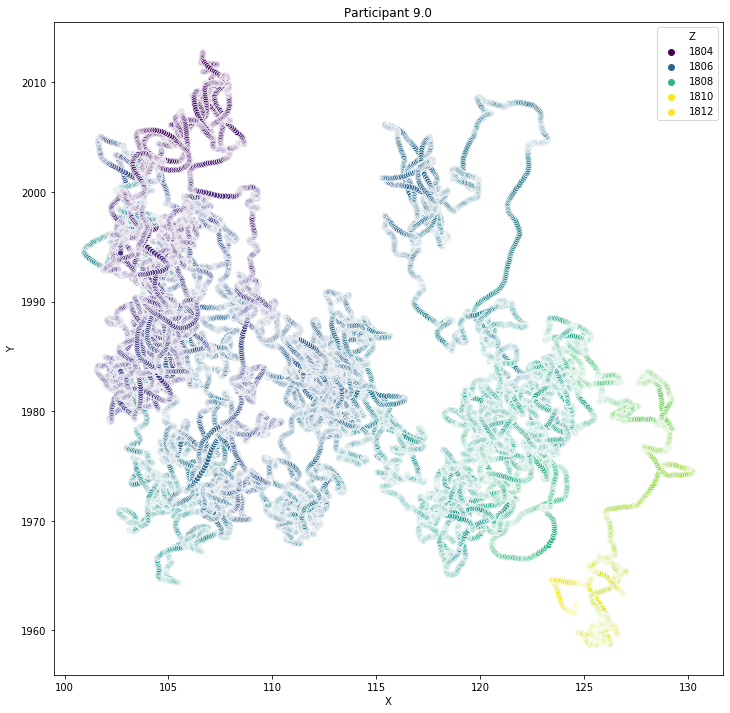

In [36]:
#sns.color_palette('viridis')
plt.figure(figsize=(12,12))
sns.scatterplot(x='X', y='Y', hue='Z', data=B[1], palette='viridis')
title = B[1]['PID'].mean()
plt.title('Participant ' + str(title))
plt.show()

In [37]:
#for p in range(2, len(B)):
#    group_b = B[1]
 #   if p=='count':
 #       continue
 #   else:
 #       group_b = group_b.join(B[p], on='PID', how ='outer', lsuffix='p')

### Plot X, Y, Z data per participant

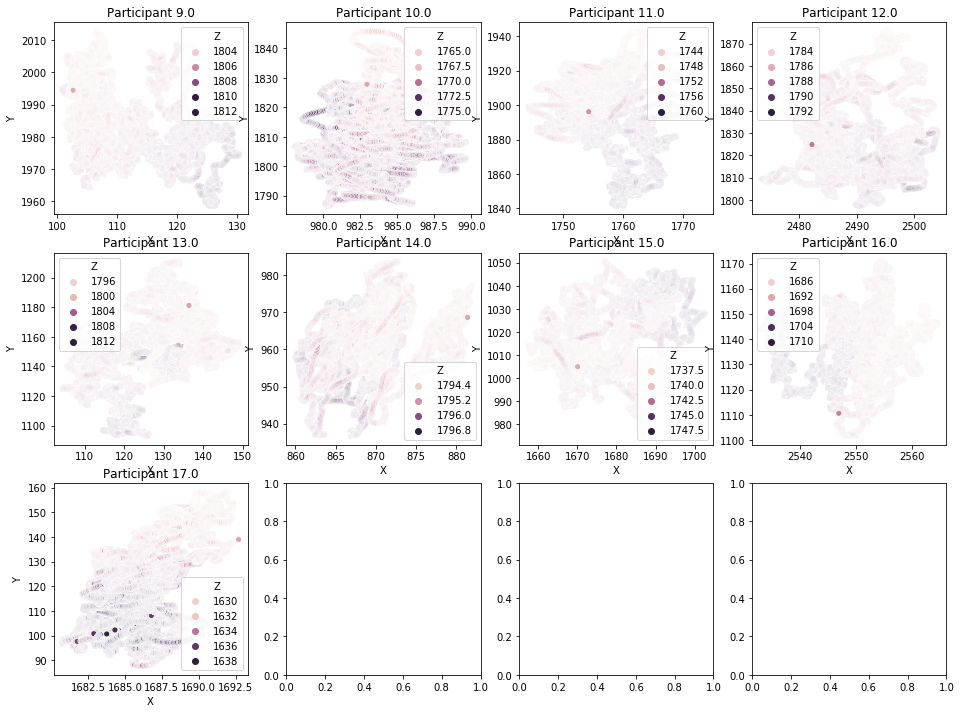

In [33]:
fig, axes_avail = plt.subplots(3, 4, figsize=(16,12))

Scatter_Group(B, axes_avail)
#can't get this color palette to take, tried this too,  but it threw and error
plt.show()

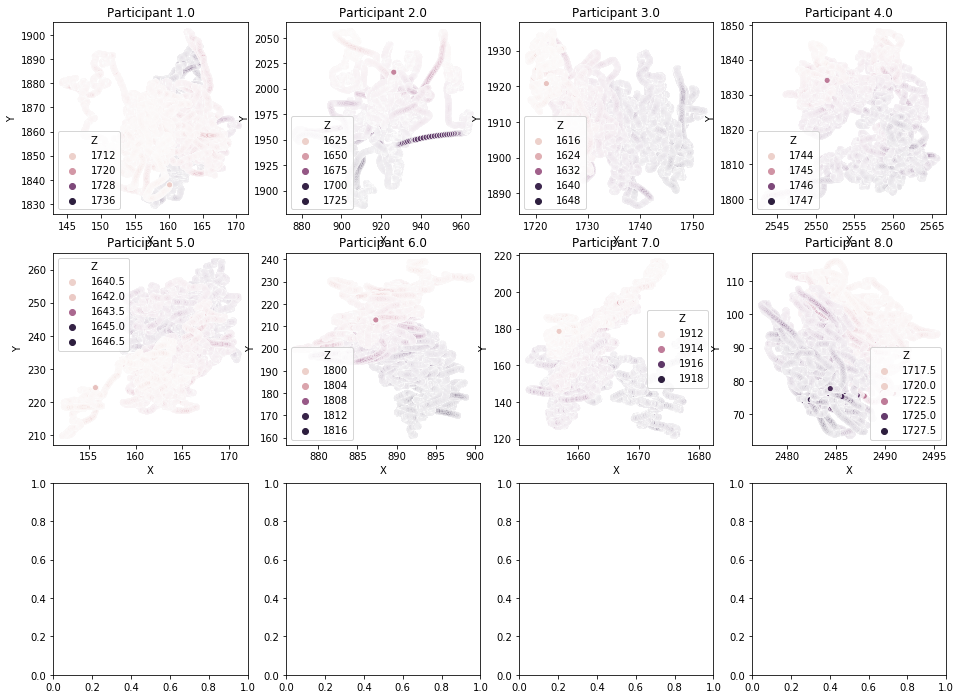

In [34]:
fig, axes_avail = plt.subplots(3, 4, figsize=(16,12))
Scatter_Group(A, axes_avail)
plt.show()

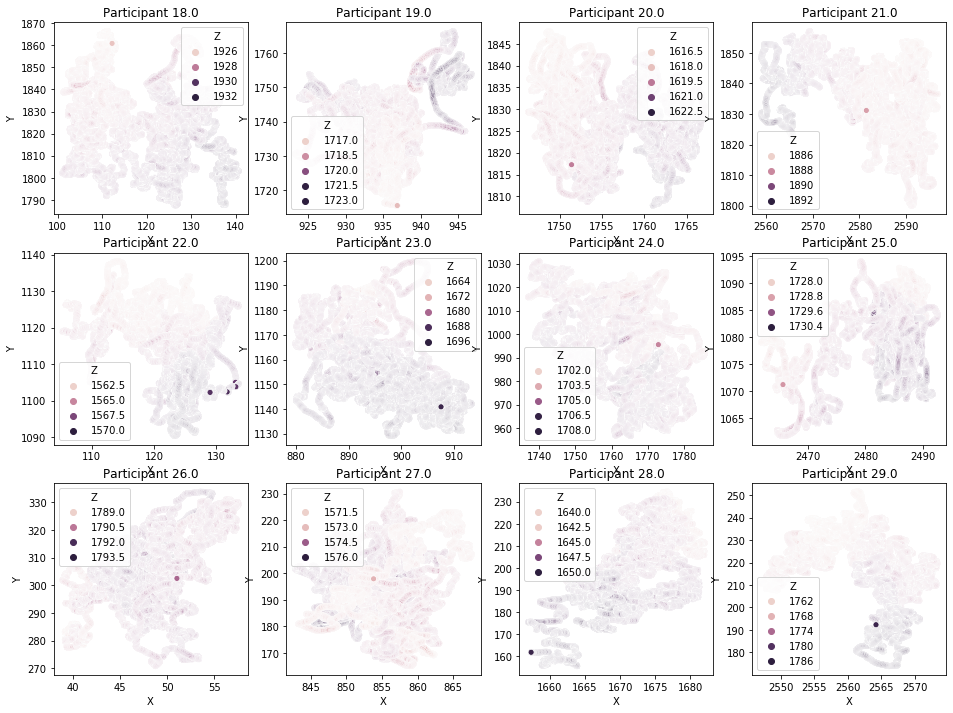

In [35]:
fig, axes_avail = plt.subplots(3, 4, figsize=(16,12))
Scatter_Group(C, axes_avail)
plt.show()

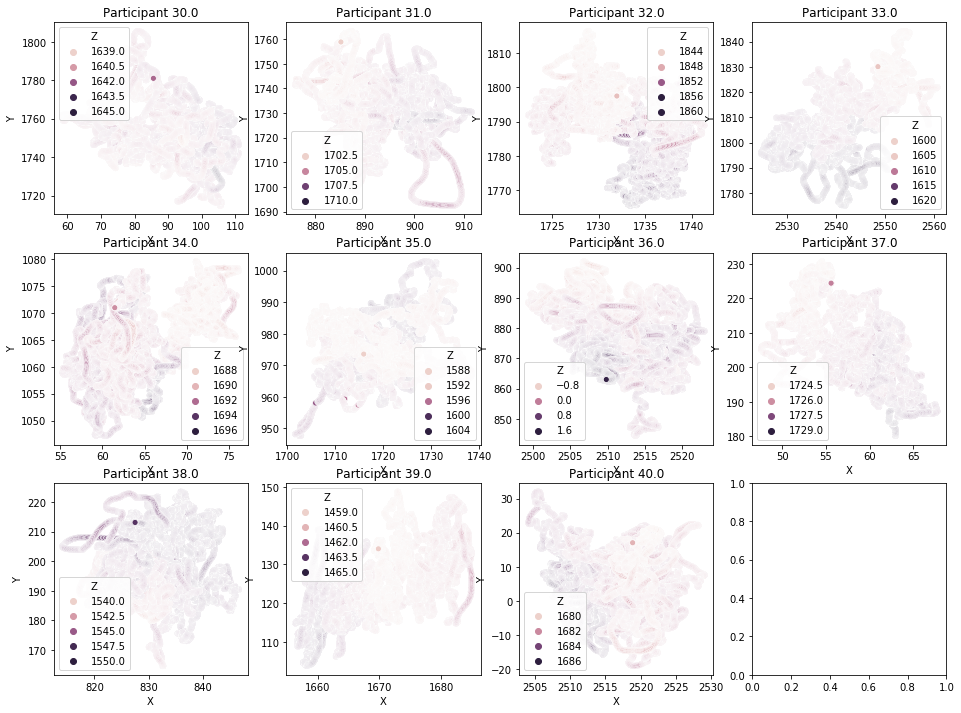

In [36]:
fig, axes_avail = plt.subplots(3, 4, figsize=(16,12))
Scatter_Group(D, axes_avail)
plt.show()

In [37]:
#fig, axes_avail = plt.subplots(3, 4, figsize=(16,12))
#Scatter_Group(E, axes_avail)
#plt.show()
#Ran into an error taking more of a look at the group data
E[9]

,Unnamed: 27,PID
0,NaN,49
1,NaN,49
2,NaN,49
3,NaN,49
4,NaN,49
...,...,...
35796,NaN,49
35797,NaN,49
35798,NaN,49
35799,NaN,49


In [38]:
#Reloading the base group data to take a look
motion_file = r'Source_Data\Micro_Motion_2012\mocap_data\nmE.tsv'
motionE = pd.read_csv(motion_file, delimiter='\t', encoding='utf-8', skiprows=10, low_memory=False)
motionE.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35801 entries, 0 to 35800
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   s3 X         35801 non-null  float64
 1   s3 Y         35801 non-null  float64
 2   s3 Z         35801 non-null  float64
 3   s4 X         35801 non-null  float64
 4   s4 Y         35801 non-null  float64
 5   s4 Z         35801 non-null  float64
 6   s5 X         35801 non-null  float64
 7   s5 Y         35801 non-null  float64
 8   s5 Z         35801 non-null  float64
 9   s6 X         35801 non-null  float64
 10  s6 Y         35801 non-null  float64
 11  s6 Z         35801 non-null  float64
 12  s7 X         35801 non-null  float64
 13  s7 Y         35801 non-null  float64
 14  s7 Z         35801 non-null  float64
 15  s8 X         35801 non-null  float64
 16  s8 Y         35801 non-null  float64
 17  s8 Z         35801 non-null  float64
 18  s9 X         35801 non-null  float64
 19  s9 Y

Group E appears to be missing a static column, which means the separate participant call earlier didn't sperate it correctly. Needs to reload E. 

In [39]:
#Reloading group E
motion_file = r'Source_Data\Micro_Motion_2012\mocap_data\nmE.tsv'
motionE = pd.read_csv(motion_file, delimiter='\t', encoding='utf-8', skiprows=10, low_memory=False)
E = {}
E['count'] = 9
dict_key = 1
for i in range(0, 9*3, 3):
    E[dict_key] = motionE.iloc[:,i:i+3].copy(deep=True)
    dict_key += 1
E[9].head()

,s12 X,s12 Y,s12 Z
0,3140.118,-262.589,1809.224
1,3140.132,-262.576,1809.225
2,3140.114,-262.552,1809.232
3,3140.220,-262.601,1809.264
4,3140.145,-262.563,1809.226


In [40]:
#Rerunning previous functions for formatting
Add_PID([E])
Rename_motion_columns(E)

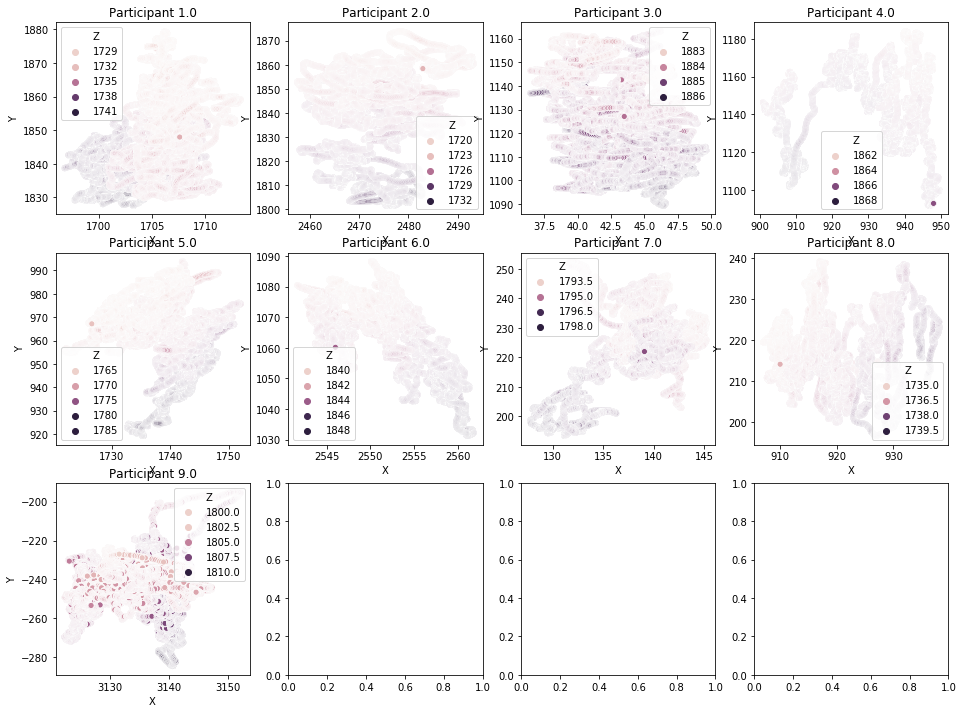

In [41]:
fig, axes_avail = plt.subplots(3, 4, figsize=(16,12))
Scatter_Group(E, axes_avail)
plt.show()

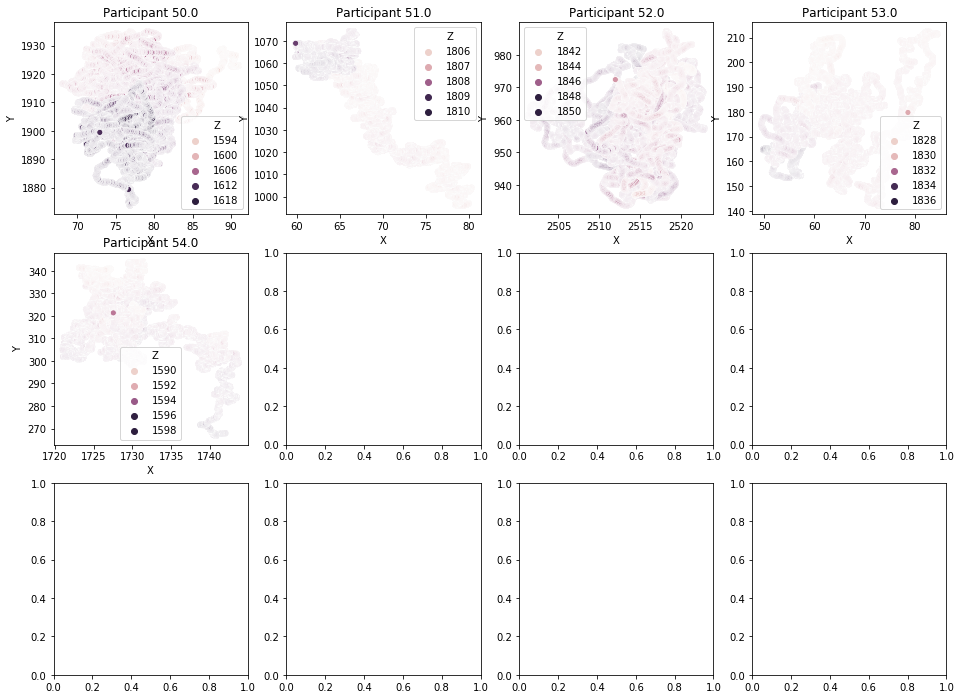

In [42]:
fig, axes_avail = plt.subplots(3, 4, figsize=(16,12))
Scatter_Group(F, axes_avail)
plt.show()

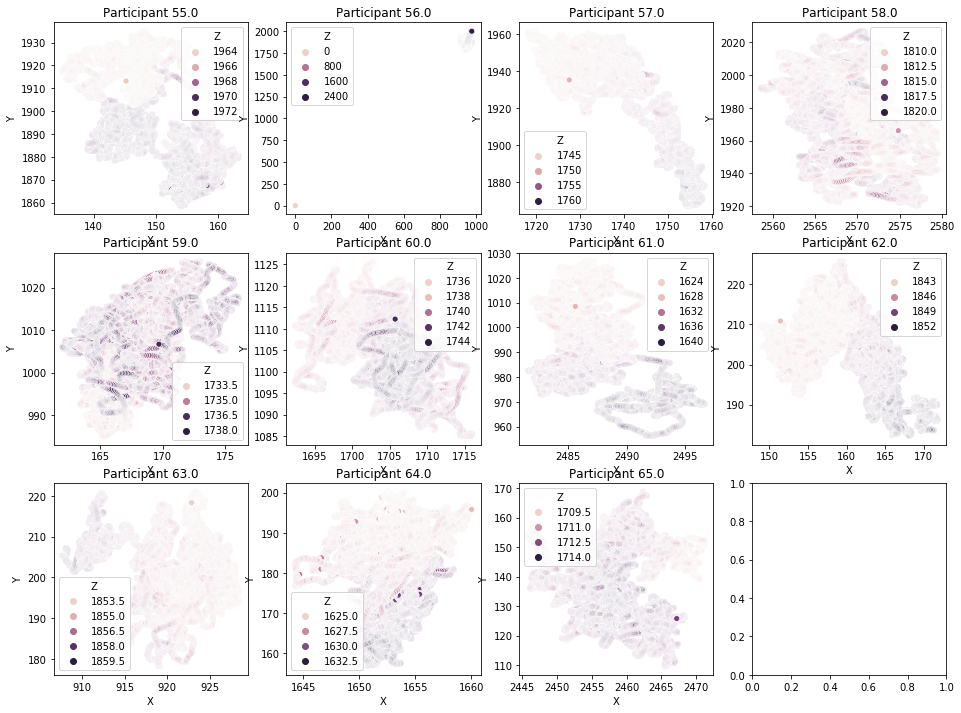

In [43]:
fig, axes_avail = plt.subplots(3, 4, figsize=(16,12))
Scatter_Group(G, axes_avail)
plt.show()

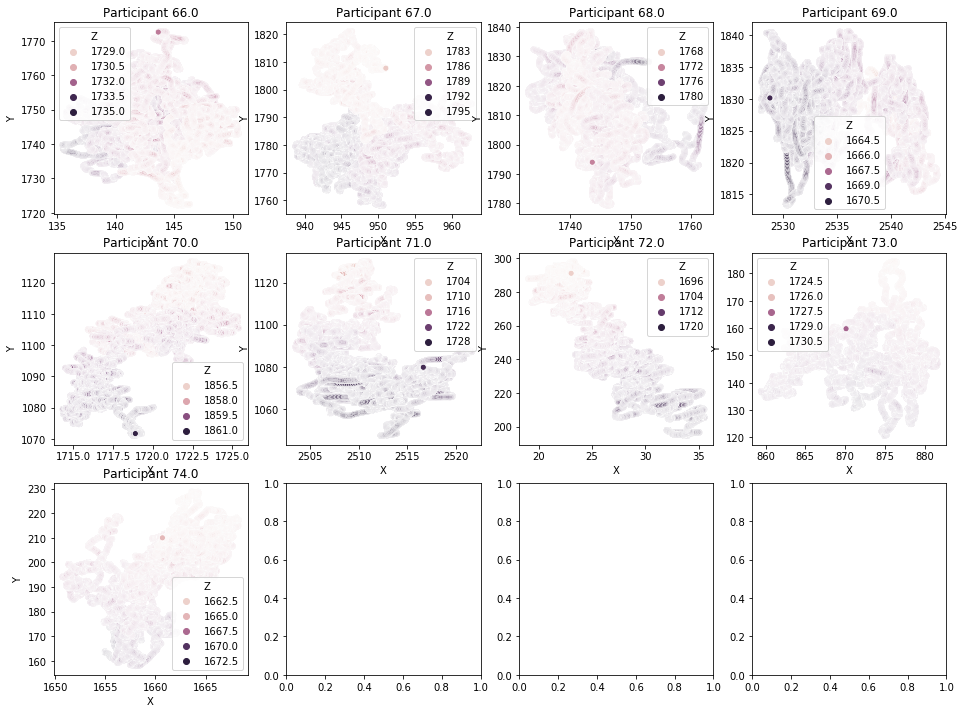

In [44]:
fig, axes_avail = plt.subplots(3, 4, figsize=(16,12))
Scatter_Group(H, axes_avail)
plt.show()

Looks like Participant 56 has some issue with their motin data, take a closer look

In [41]:
G[2].nunique()

X      20178
Y      24348
Z       5152
PID        1
dtype: int64

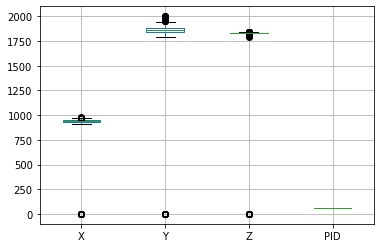

In [42]:
G[2].boxplot()
plt.show()

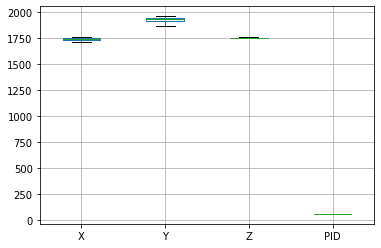

In [43]:
G[3].boxplot()
plt.show()

Particpant 56 should be removed as they appear to be missing a considerable amount of motion data

In [44]:
del G[2]
G.keys()

dict_keys(['count', 1, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [45]:
import pyarrow.feather as feather

In [55]:
counts = []
for g in range(len(group)):
    counts.append(group[g]['count'])
counts

[8, 9, 12, 11, 9, 5, 11, 9]

In [61]:
group[0][1]['PID'][0]


1

In [67]:
#We will use the pyarow.feather package to export the dataframes of each participant for use in other notebooks
def export_participant_dfs(list_of_dicts):
    for g in range(len(group)):
        for GID in range(1,group[g]['count']+1):
            if GID not in group[g].keys():
                continue
            else:
                PID = str(group[g][GID]['PID'][0])
                filename = 'PID_motion_' + PID
                feather.write_feather(group[g][GID], 'Participant_Motion/' + filename)


In [68]:
#export each participant (commented out so as not to overwrite without intention)
#export_participant_dfs(group)

In [69]:
#export demographic dataframe (commented out so as to not overwrite without intention)
#feather.write_feather(demos, 'demos_df')

Note that PID 3 has NaN under 'Sex'. This was left in to simplify the PID import sequence. There are two total PID's with NaN in teh 'Sex' column and we will eliminate them prior to entering into model. If 'Sex' turns out to be a minimally dependant variable then we will add back in using M for one and F for the other in order to gain their motion data, otherwise they will just be dropped if 'Sex' is a strong variable as we don't want to sway the model with incorrect data.


# Summary
The data for both demographics was read in and combine so that we can view individual participant demopgrahic data with their motion data. The sound data is the next step bring in clean as needed. The EDA and feature engineering process will proceed with a single participant at first and then expanded to other participants.